In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

In [23]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [2]:
data = pd.read_csv('uber.csv')

In [3]:
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
data.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [6]:
data.shape

(200000, 9)

In [7]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
X = data[["pickup_longitude", "dropoff_longitude",
          "pickup_latitude", "dropoff_latitude"]]


In [11]:
X.head()

,pickup_longitude,dropoff_longitude,pickup_latitude,dropoff_latitude
0,-73.999817,-73.999512,40.738354,40.723217
1,-73.994355,-73.994710,40.728225,40.750325
2,-74.005043,-73.962565,40.740770,40.772647
3,-73.976124,-73.965316,40.790844,40.803349
4,-73.925023,-73.973082,40.744085,40.761247


In [12]:
y = data["fare_amount"]


In [13]:
y.shape

(199999,)

In [14]:
corr = data.corr()
print(corr)

                   Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000     0.000587          0.000230        -0.000341   
fare_amount          0.000587     1.000000          0.010458        -0.008482   
pickup_longitude     0.000230     0.010458          1.000000        -0.816461   
pickup_latitude     -0.000341    -0.008482         -0.816461         1.000000   
dropoff_longitude    0.000270     0.008986          0.833026        -0.774787   
dropoff_latitude     0.000271    -0.011014         -0.846324         0.702367   
passenger_count      0.002259     0.010158         -0.000415        -0.001559   

                   dropoff_longitude  dropoff_latitude  passenger_count  
Unnamed: 0                  0.000270          0.000271         0.002259  
fare_amount                 0.008986         -0.011014         0.010158  
pickup_longitude            0.833026         -0.846324        -0.000415  
pickup_latitude            -0.774787          0.702367 

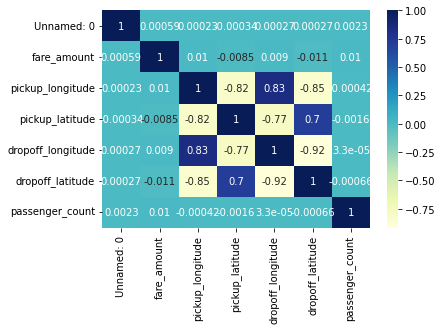

In [17]:
dataplot = sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [24]:
error_rate_test = r2_score(y_test,y_pred)
error_rate_test

8.972144289809414e-05

In [25]:
print(mean_squared_error(y_test,y_pred,squared=False))

10.00237472211364


In [27]:
rmse = sqrt(mean_squared_error(y_test, y_pred, ))
rmse


10.00237472211364

In [28]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor()

In [29]:
model2.fit(X_train,y_train)

RandomForestRegressor()

In [30]:
y_predrf = model2.predict(X_test)

In [32]:
r2 = r2_score(y_test,y_pred)
r2

8.972144289809414e-05